In [1]:
#!pip install perlin-noise

  Obtaining dependency information for perlin-noise from https://files.pythonhosted.org/packages/a1/e0/3319e5911f456ce702d45c23f8a56f56c2d4a3c80308fa68450bf195a183/perlin_noise-1.12-py3-none-any.whl.metadata


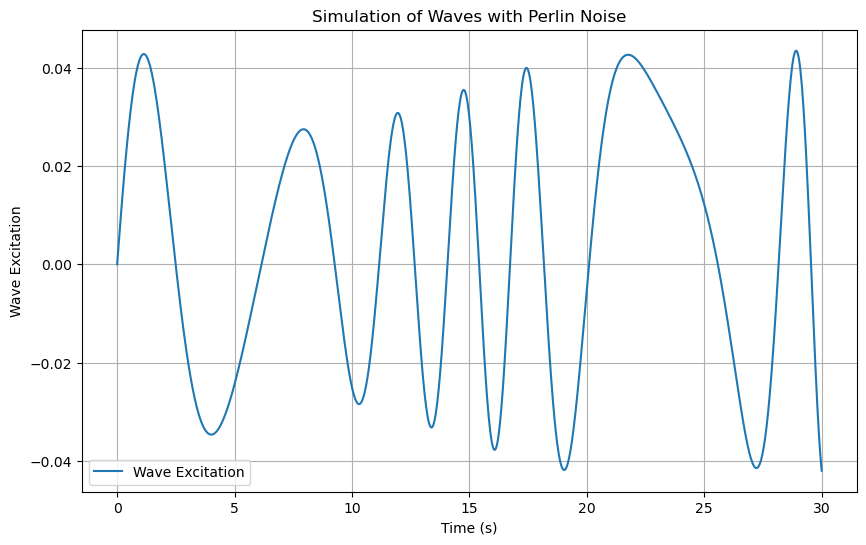

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from perlin_noise import PerlinNoise

# Parameters
g = 9.81  # Acceleration due to gravity
time_steps = 1000  # Number of time steps
duration = 30  # Duration in seconds
A0_base = 2.0  # Base wave height
wf_base = 1.40071  # Base wave frequency

# Time array
ts = np.linspace(0, duration, time_steps)

# Create Perlin noise functions for wf and A0
noise_wf = PerlinNoise(octaves=2)
noise_A0 = PerlinNoise(octaves=1)

# Generate smooth variations in wf and A0 over time
wf_variation = np.array([wf_base + noise_wf([t / duration]) for t in ts])
A0_variation = np.array([A0_base + noise_A0([t / duration]) for t in ts])

# Interpolate the variations to match the time steps
interp_wf = interp1d(ts, wf_variation, kind='cubic')
interp_A0 = interp1d(ts, A0_variation, kind='cubic')

# Calculate wave excitation with smoothed variations
lda = g * 2 * np.pi / interp_wf(ts)
aphm0 = interp_A0(ts) / lda
E = aphm0 * np.sin(interp_wf(ts) * ts)

# Plot the waves
plt.figure(figsize=(10, 6))
plt.plot(ts, E, label='Wave Excitation')
plt.title('Simulation of Waves with Perlin Noise')
plt.xlabel('Time (s)')
plt.ylabel('Wave Excitation')
plt.grid(True)
plt.legend()
plt.show()